<a href="https://colab.research.google.com/github/kenanmorani/Machine_Learning_idu/blob/main/CIFAR-100/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip uninstall keras
!pip install keras

# Imprting libraries, setting paths and exploring the dataset

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.callbacks import Callback, LearningRateScheduler, TensorBoard, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
#from keras.utils import print_summary
from keras import backend as K
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Setting constans and directories
BATCH_SIZE = 100
NUM_CLASSES = 100  # The number of classes in the dataset is 100 classes of images
EPOCHS = 165000
INIT_DROPOUT_RATE = 0.5
MOMENTUM_RATE = 0.9
INIT_LEARNING_RATE = 0.01
L2_DECAY_RATE = 0.0005
CROP_SIZE = 32
LOG_DIR = './logs'
MODEL_PATH = './keras_cifar100_model.h5'

In [4]:
# Loading the data using keras
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 2s 0us/step


In [ ]:
# Printing data as arrays
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


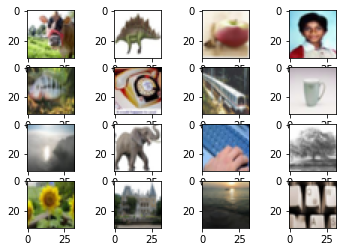

In [ ]:
# Looking at the first 16 images in the dataset 
m=4 # The number of images to show in each dataset X4
k=0 # The index of the intial images in the dataset
plt.figure(1)
for i in range(0,m):
  for j in range(0,m):
    plt.subplot2grid((m,m),(i,j))
    plt.imshow(x_train[k])
    k=k+1
plt.show()  # Images are all 32x32 in size with a depth demintion, thus 3 demintional data

# Preprocessing the data

In [ ]:
# changing the images to categorical 
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)
print(y_train.shape,y_test.shape)

(50000, 100) (10000, 100)


In [ ]:
# Normalizing the dataset to floats between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

# Building a first model

In [ ]:
# Building a CNN model
model = Sequential()
model.add(ZeroPadding2D(4, input_shape=x_train.shape[1:]))
# Stack 1: Convolution network layer using elu for activation, Maxpooling and dropout
model.add(Conv2D(384, (3, 3), padding='same', kernel_regularizer=l2(0.01)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
# Stack 2: 3 Convolution network layers using elu for activation, Maxpooling and dropout
model.add(Conv2D(384, (1, 1), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(384, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(640, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(640, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
# Stack 3: 4 Convolution network layers using elu for activation, Maxpooling and dropout
model.add(Conv2D(640, (3, 3), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(768, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(768, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(768, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
# Stack 4: 3 Convolution network layers using elu for activation, Maxpooling and dropout
model.add(Conv2D(768, (1, 1), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(896, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(896, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
# Stack 5: 3 Convolution network layers using elu for activation, Maxpooling and dropout
model.add(Conv2D(896, (3, 3), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(1024, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(1024, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
# Stack 6: 3 Convolution network layers using elu for activation, Maxpooling and dropout
model.add(Conv2D(1024, (1, 1), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Conv2D(1152, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
# Stack 7: 1 Convolution network layer using elu for activation, Maxpooling and dropout
model.add(Conv2D(1152, (1, 1), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(INIT_DROPOUT_RATE))
model.add(Flatten())  # Adding flatten function
model.add(Dense(NUM_CLASSES)) # Adding dense function(number of arguments here is the number of the classes in the dataset)
model.add(Activation('softmax'))  # Choosing f\softmax as an activation function at the output

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 40, 40, 3)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 40, 40, 384)       10752     
_________________________________________________________________
activation_8 (Activation)    (None, 40, 40, 384)       0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 20, 20, 384)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 20, 20, 384)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 20, 20, 384)       147840    
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 20, 20, 384)      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train, batch_size=256, epochs=7, validation_split=0.2)

Epoch 1/7
157/157 [==============================] - 236s 1s/step - loss: 25.0984 - accuracy: 0.0109 - val_loss: 11.7515 - val_accuracy: 0.0098
Epoch 2/7
157/157 [==============================] - 218s 1s/step - loss: 12.3220 - accuracy: 0.0104 - val_loss: 11.4313 - val_accuracy: 0.0101
Epoch 3/7
157/157 [==============================] - 218s 1s/step - loss: 11.9487 - accuracy: 0.0089 - val_loss: 11.1389 - val_accuracy: 0.0090
Epoch 4/7
157/157 [==============================] - 218s 1s/step - loss: 11.5762 - accuracy: 0.0110 - val_loss: 10.8238 - val_accuracy: 0.0104
Epoch 5/7
157/157 [==============================] - 218s 1s/step - loss: 11.2296 - accuracy: 0.0094 - val_loss: 10.5528 - val_accuracy: 0.0087
Epoch 6/7
157/157 [==============================] - 218s 1s/step - loss: 10.9092 - accuracy: 0.0108 - val_loss: 10.2706 - val_accuracy: 0.0105
Epoch 7/7
157/157 [==============================] - 212s 1s/step - loss: 909892474114.6278 - accuracy: 0.0110 - val_loss: 23.6829 - val

In [ ]:
# Evaluating the model 
model.evaluate(x_test, y_test)

313/313 [==============================] - 20s 63ms/step - loss: 23.6765 - accuracy: 0.0100


[23.67653465270996, 0.009999999776482582]

Text(0.5, 0, 'Epoch')

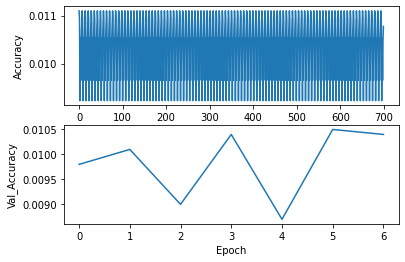

In [ ]:
# Visualizing the model's accuracy
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
#plt.plot(hist.history['val_accuracy'])
#plt.title('The Models Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
#plt.legend('Train', 'Val', loc='upper_right')
#plt.show()
plt.subplot(2,1,2)
#plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
#plt.title('The Models Accuracy')
plt.ylabel('Val_Accuracy')
plt.xlabel('Epoch')
#plt.legend('Train', 'Val', loc='upper_right')
#plt.show()

# Building a second model

In [ ]:
# The second model is architectured using tflearn library
!pip install tflearn

     |████████████████████████████████| 112kB 17.2MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-cp36-none-any.whl size=127301 sha256=26c6fb84cf6bded5342cfdae62d4b7d007f8b366244ed2b3ae0cc3c4b19a36e8
  Stored in directory: /root/.cache/pip/wheels/31/d2/ed/fb9a0d301dd9586c11e9547120278e624227f22fd5f4baf744
Successfully built tflearn


In [ ]:
import tflearn
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
network = input_data(shape=[None, 32, 32, 3])
network = conv_2d(network, 32, 3, strides=1, padding='same', activation='relu', bias=True, 
                  bias_init='zeros', weights_init='uniform_scaling')
network = max_pool_2d(network, 2 , strides=None, padding='same')
network = conv_2d(network, 64, 3, strides=1, padding='same', activation='relu', bias=True, 
                  bias_init='zeros', weights_init='uniform_scaling')
network = conv_2d(network, 64, 3 , strides=1, padding='same', activation='relu', bias=True, 
                  bias_init='zeros', weights_init='uniform_scaling')
network = max_pool_2d(network, 2 , strides=None, padding='same')
network = fully_connected(network, 600, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 100, activation='softmax')
network = regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
histt = model.fit(x_train, y_train ,n_epoch=50, shuffle=True, validation_set=(x_test, y_test),
          show_metric=True, batch_size=100 , run_id="withoutaugpre")

Training Step: 49999  | total loss: 0.22247 | time: 6.928s
| Adam | epoch: 100 | loss: 0.22247 - acc: 0.9327 -- iter: 49900/50000
Training Step: 50000  | total loss: 0.22574 | time: 8.213s
| Adam | epoch: 100 | loss: 0.22574 - acc: 0.9285 | val_loss: 5.71630 - val_acc: 0.3791 -- iter: 50000/50000
--


In [ ]:
plt.plot(histt.history['acc'])

AttributeError: ignored

In [ ]:
# Evaluating the mode
scores = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

[0.3791]

In [ ]:
# Visualizing the model's accuracy
plt.plot(histt.history['accuracy'])
#plt.plot(hist.history['val_accuracy'])
#plt.title('The Models Accuracy')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch')
#plt.legend('Train', 'Val', loc='upper_right')
#plt.show()

AttributeError: ignored

In [ ]:
def lr_scheduler(epoch, lr, step_decay = 0.1):
    return float(lr * step_decay) if epoch == 35.000 else lr

In [ ]:
def dr_scheduler(epoch, layers, rate_list = [0.0, .1, .2, .3, .4, .5, 0.0], rate_factor = 1.5):
    if epoch == 85000:
        for i, layer in enumerate([l for l in layers if "dropout" in np.str.lower(l.name)]):
            layer.rate = layer.rate + rate_list[i]
    elif epoch == 135000:
        for i, layer in enumerate([l for l in layers if "dropout" in np.str.lower(l.name)]):
            layer.rate = layer.rate + layer.rate * rate_factor if layer.rate <= 0.66 else 1
    return layers

In [ ]:
class StepLearningRateSchedulerAt(LearningRateScheduler):
    def __init__(self, schedule, verbose = 0): 
        super(LearningRateScheduler, self).__init__()
        self.schedule = schedule
        self.verbose = verbose
    
    def on_epoch_begin(self, epoch, logs=None): 
        if not hasattr(self.model.optimizer, 'lr'):
            raise ValueError('Optimizer must have a "lr" attribute.')
            
        lr = float(K.get_value(self.model.optimizer.lr))
        lr = self.schedule(epoch, lr)
       
        if not isinstance(lr, (float, np.float32, np.float64)):
            raise ValueError('The output of the "schedule" function ' 'should be float.')
        
        K.set_value(self.model.optimizer.lr, lr)
        if self.verbose > 0: 
            print('\nEpoch %05d: LearningRateScheduler reducing learning ' 'rate to %s.' % (epoch + 1, lr))

In [ ]:

class DropoutRateScheduler(Callback):
    def __init__(self, schedule, verbose = 0):
        super(Callback, self).__init__()
        self.schedule = schedule
        self.verbose = verbose
        
    def on_epoch_begin(self, epoch, logs=None):
        if not hasattr(self.model, 'layers'):
            raise ValueError('Model must have a "layers" attribute.')
            
        layers = self.model.layers
        layers = self.schedule(epoch, layers)
        
        if not isinstance(layers, list):
            raise ValueError('The output of the "schedule" function should be list.')
        
        self.model.layers = layers
        
        if self.verbose > 0:
            for layer in [l for l in self.model.layers if "dropout" in np.str.lower(l.name)]:
                print('\nEpoch %05d: Dropout rate for layer %s: %s.' % (epoch + 1, layer.name, layer.rate))

In [ ]:
def random_crop(img, random_crop_size):
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img[y:(y+dy), x:(x+dx), :]

In [ ]:
def crop_generator(batches, crop_length, num_channel = 3):
    while True:
        batch_x, batch_y = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, num_channel))
        for i in range(batch_x.shape[0]):
            batch_crops[i] = random_crop(batch_x[i], (crop_length, crop_length))
        yield (batch_crops, batch_y)

In [ ]:
opt = SGD(lr=INIT_LEARNING_RATE, momentum=MOMENTUM_RATE)

In [ ]:

lr_rate_scheduler = StepLearningRateSchedulerAt(lr_scheduler)
dropout_scheduler = DropoutRateScheduler(dr_scheduler)
tensorboard = TensorBoard(log_dir=LOG_DIR, batch_size=BATCH_SIZE)
checkpointer = ModelCheckpoint(MODEL_PATH, monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy', 'top_k_categorical_accuracy'])

W0713 05:45:55.461751 140594951563136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:711: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 05:45:55.484884 140594951563136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2884: The name tf.log is deprecated. Please use tf.math.log instead.



In [ ]:
datagen = ImageDataGenerator(samplewise_center=True,
                             zca_whitening=True,
                             horizontal_flip=True
                            )

In [ ]:
datagen.fit(x_train)

In [ ]:
train_flow = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)
train_flow_w_crops = crop_generator(train_flow, CROP_SIZE)
valid_flow = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

In [ ]:
model.fit_generator(train_flow_w_crops,
                    epochs=EPOCHS,
                    steps_per_epoch=len(x_train) / BATCH_SIZE,
                    callbacks=[lr_rate_scheduler, dropout_scheduler, tensorboard, checkpointer],
                    validation_data=valid_flow,
                    validation_steps=(len(x_train) / BATCH_SIZE))

W0713 05:46:16.646206 140594951563136 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0713 05:46:17.121821 140594951563136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:953: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0713 05:46:17.125928 140594951563136 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:675: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0713 

Epoch 1/165000
500/500 [==============================] - 820s 2s/step - loss: 10.9009 - acc: 0.0208 - top_k_categorical_accuracy: 0.0964 - val_loss: 10.5665 - val_acc: 0.0287 - val_top_k_categorical_accuracy: 0.1216
Epoch 2/165000
500/500 [==============================] - 799s 2s/step - loss: 9.8963 - acc: 0.0649 - top_k_categorical_accuracy: 0.2295 - val_loss: 9.3701 - val_acc: 0.0980 - val_top_k_categorical_accuracy: 0.3156
Epoch 3/165000
500/500 [==============================] - 799s 2s/step - loss: 9.0102 - acc: 0.1118 - top_k_categorical_accuracy: 0.3409 - val_loss: 8.4968 - val_acc: 0.1588 - val_top_k_categorical_accuracy: 0.4201
Epoch 4/165000
500/500 [==============================] - 799s 2s/step - loss: 8.2542 - acc: 0.1573 - top_k_categorical_accuracy: 0.4342 - val_loss: 7.7172 - val_acc: 0.2187 - val_top_k_categorical_accuracy: 0.5266
Epoch 5/165000
500/500 [==============================] - 798s 2s/step - loss: 7.6141 - acc: 0.2043 - top_k_categorical_accuracy: 0.4986 -